<a href="https://colab.research.google.com/github/pransen/DeepLearningWorkshop_IIITDM/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
!wget -O cats_vs_dogs.zip "https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip"
!unzip cats_vs_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import os, shutil
from sklearn.model_selection import train_test_split
import random

original_dataset_dir = '/content/PetImages'
base_dir = '/content/cats_and_dogs'

# Make base folders
os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

for folder in [train_dir, val_dir]:
    os.makedirs(os.path.join(folder, 'cats'), exist_ok=True)
    os.makedirs(os.path.join(folder, 'dogs'), exist_ok=True)

# Gather file paths
cat_files = [f for f in os.listdir(os.path.join(original_dataset_dir, 'Cat')) if f.endswith('.jpg')]
dog_files = [f for f in os.listdir(os.path.join(original_dataset_dir, 'Dog')) if f.endswith('.jpg')]

# Remove corrupted images
def is_valid_image(path):
    try:
        img = tf.keras.utils.load_img(path)
        return True
    except:
        return False

cat_files = [f for f in cat_files if is_valid_image(os.path.join(original_dataset_dir, 'Cat', f))]
dog_files = [f for f in dog_files if is_valid_image(os.path.join(original_dataset_dir, 'Dog', f))]

# Train-validation split
train_cats, val_cats = train_test_split(cat_files, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(dog_files, test_size=0.2, random_state=42)

# Helper function to move images
def move_files(file_list, source_dir, target_dir):
    for fname in file_list:
        shutil.copy2(os.path.join(source_dir, fname), os.path.join(target_dir, fname))

# Move images
move_files(train_cats, os.path.join(original_dataset_dir, 'Cat'), os.path.join(train_dir, 'cats'))
move_files(val_cats, os.path.join(original_dataset_dir, 'Cat'), os.path.join(val_dir, 'cats'))
move_files(train_dogs, os.path.join(original_dataset_dir, 'Dog'), os.path.join(train_dir, 'dogs'))
move_files(val_dogs, os.path.join(original_dataset_dir, 'Dog'), os.path.join(val_dir, 'dogs'))

print("✅ Dataset split and moved successfully!")


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


✅ Dataset split and moved successfully!


In [ ]:
# Data generators
train_dir = '/content/cats_and_dogs/train'
val_dir = '/content/cats_and_dogs/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


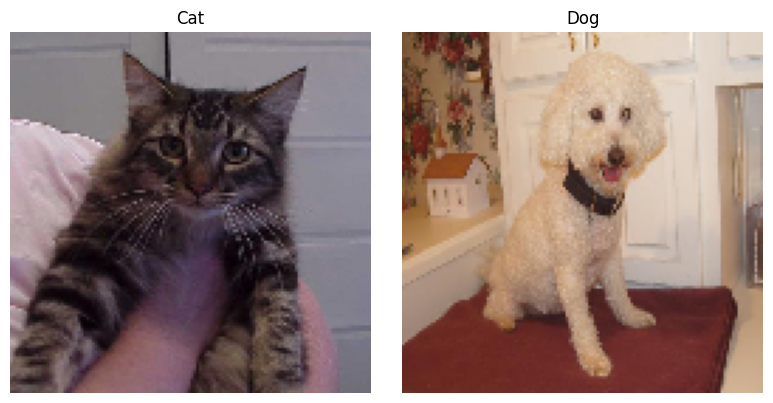

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch
images, labels = next(train_gen)

# Find indices for a cat and a dog
cat_idx = np.where(labels == 0)[0][0]  # Label 0 for 'cats'
dog_idx = np.where(labels == 1)[0][0]  # Label 1 for 'dogs'

# Display
plt.figure(figsize=(8, 4))

# Cat
plt.subplot(1, 2, 1)
plt.imshow(images[cat_idx])
plt.title("Cat")
plt.axis('off')

# Dog
plt.subplot(1, 2, 2)
plt.imshow(images[dog_idx])
plt.title("Dog")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.5769 - loss: 0.6851 - val_accuracy: 0.7140 - val_loss: 0.5547
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - accuracy: 0.7504 - loss: 0.5073 - val_accuracy: 0.7966 - val_loss: 0.4376
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - accuracy: 0.8096 - loss: 0.4207 - val_accuracy: 0.7900 - val_loss: 0.4446
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.8420 - loss: 0.3580 - val_accuracy: 0.8152 - val_loss: 0.4173
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 703s 2s/step - accuracy: 0.8727 - loss: 0.3026 - val_accuracy: 0.8278 - val_loss: 0.3805


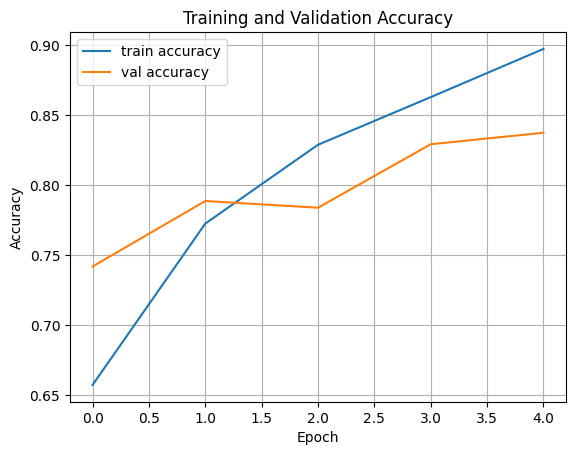

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

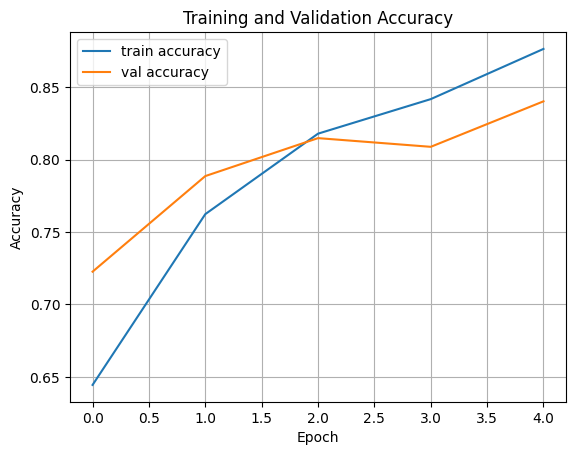

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()